In [22]:
from manim import *

config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

FPS = 30

In [64]:
%run ../../dipolo_electrico.py

In [3]:
%run ../../generadores_campo.py

# Dibujar el virus (tests)

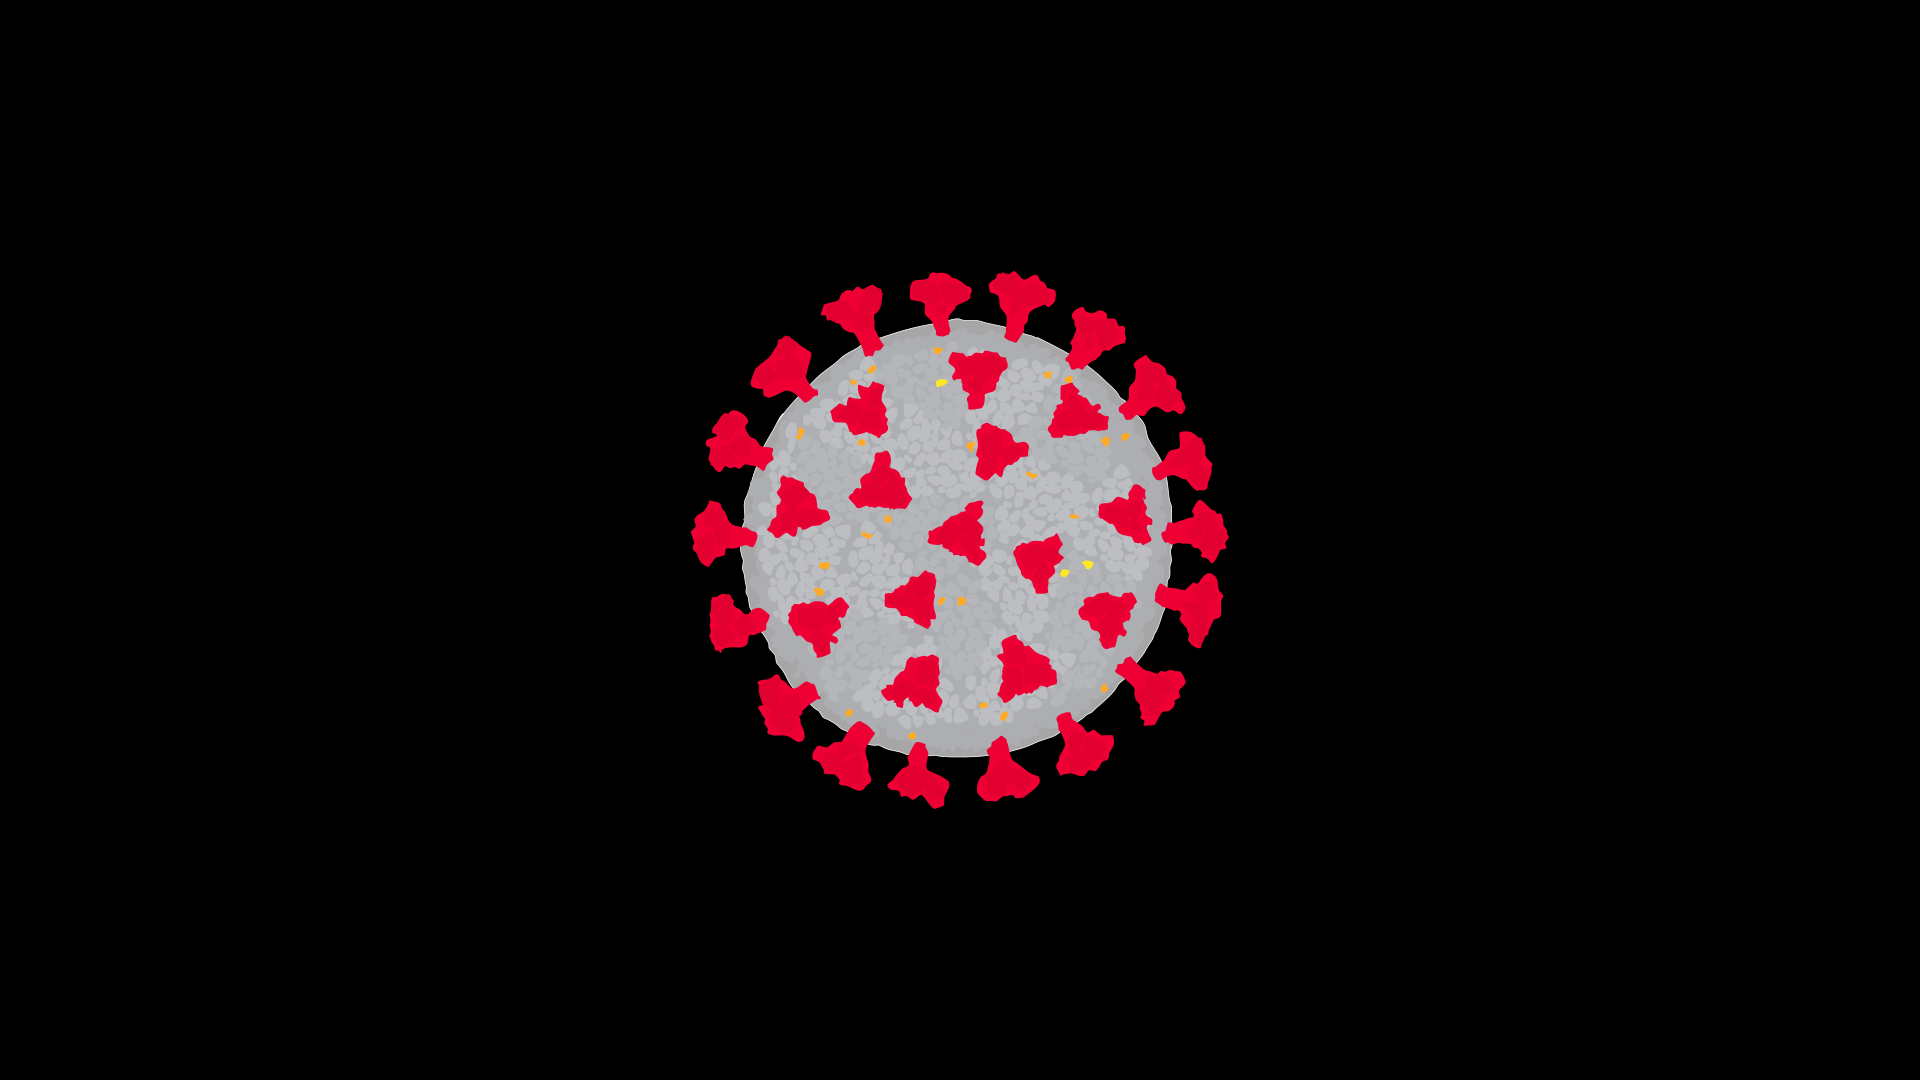

CPU times: total: 1min 7s
Wall time: 1min 4s


In [4]:
class Example(Scene):
    
    config.assets_dir = "../../img"
    
    def construct(self):
        self.add(SVGMobject("coronavirus").scale(2))
        
%time %manim $_RI

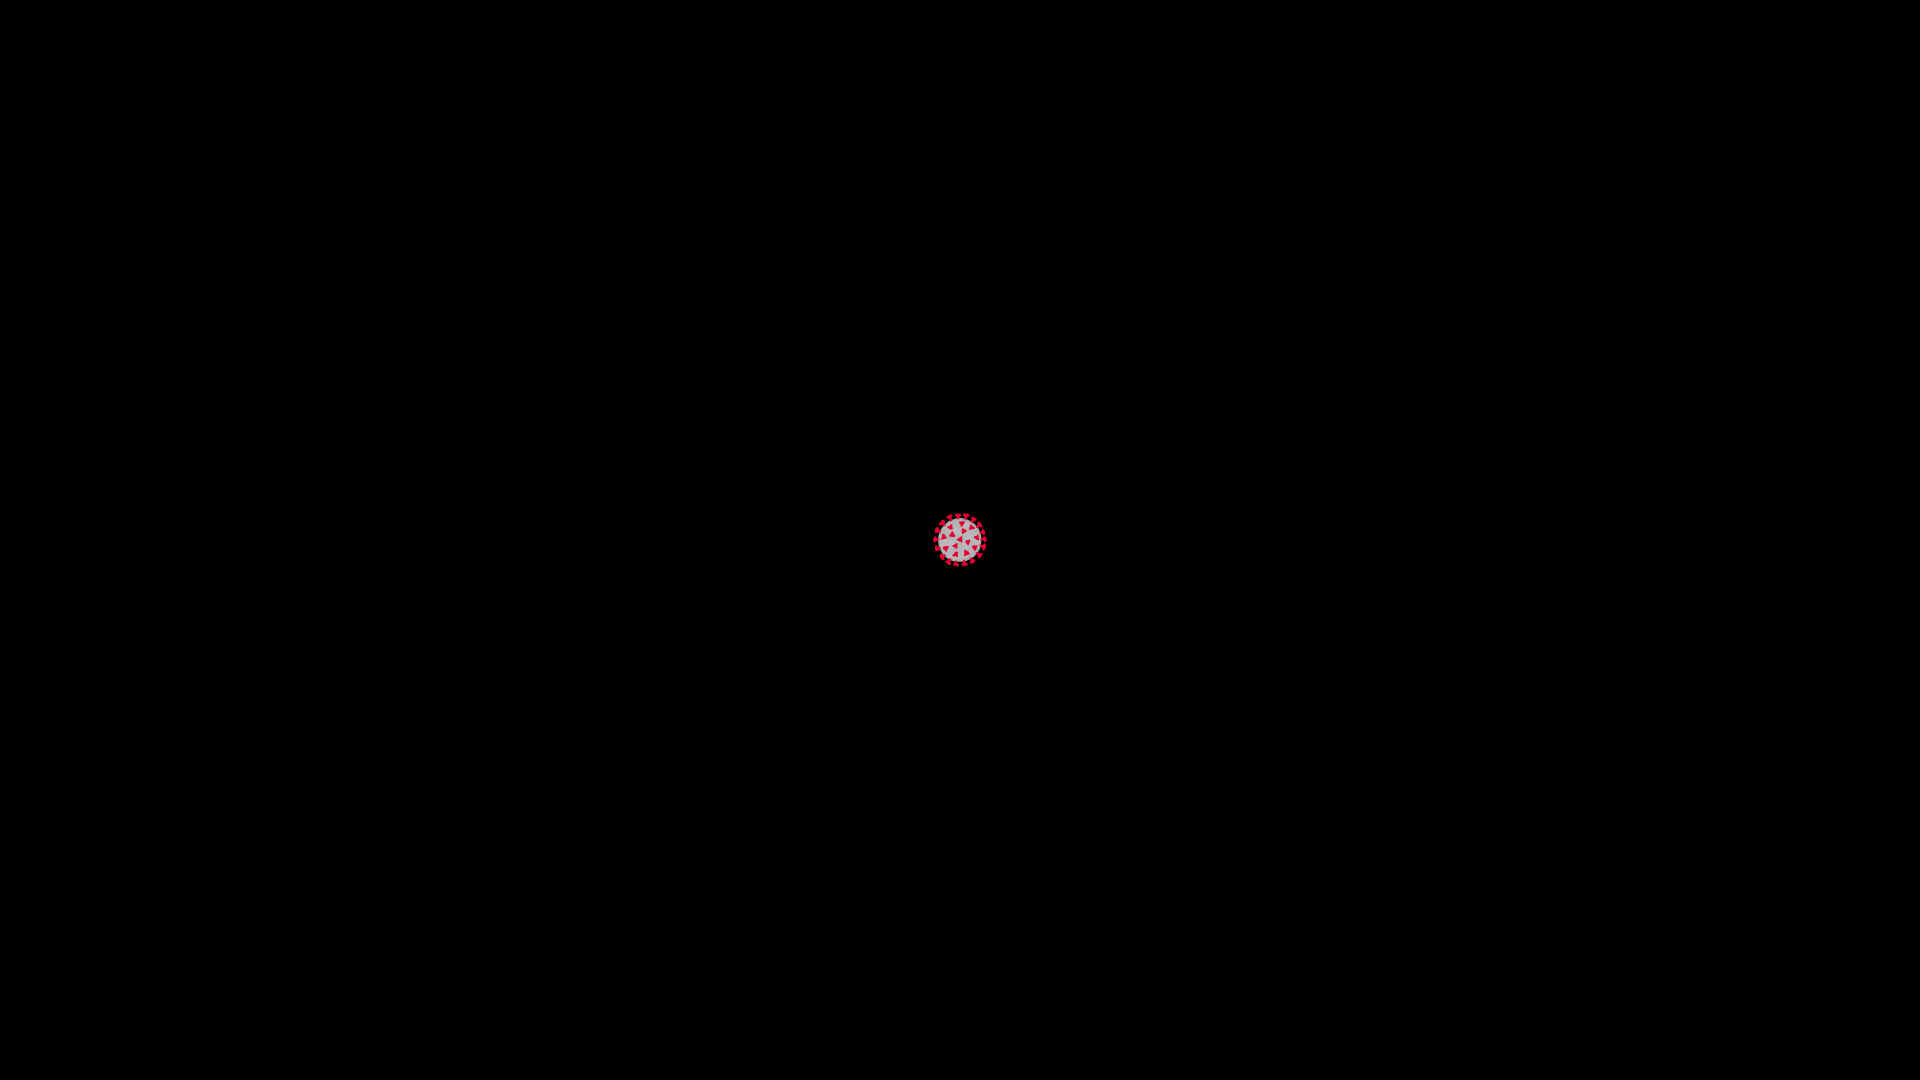

CPU times: total: 1.81 s
Wall time: 1.82 s


In [5]:
class Example(Scene):
    
    config.assets_dir = "../../img"
    
    def construct(self):
        self.add(SVGMobject("coronavirus").scale(0.2))
        
%time %manim $_RI

In [61]:
TOTAL_TIME = 30

class Example(Scene):
    
    def construct(self):
        
        print("Frame rate:", self.camera.frame_rate)

        dipolo = Virus2D(PI/8, resolver_angulo=False, resolver_desplazamiento=False)
        dipolo.save_state()
        dipolo._count = 0
        
        def dipolo_dinamica(mob, dt):
            #mob.restore()         # esto provoca error: TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'
            mob.angle += dt
            mob.rotate(mob.angle)
            dipolo._count += 1
            #print('centro = (', mob.get_center()[0], ' ,', mob.get_center()[1],')')
            #print("dt=", dt)
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        self.wait(TOTAL_TIME)
        
        print("count:", dipolo._count)
        

%time %manim $_RV

Frame rate: 30
count: 902


CPU times: total: 12min 17s
Wall time: 3min 55s


In [67]:
TOTAL_TIME = 10

class Example(Scene):

    def construct(self):
        
        print("Frame rate:", self.camera.frame_rate)

        dipolo = Virus2D(PI/8, resolver_angulo=False, resolver_desplazamiento=False, pos_draw=[1, 1, 0])
        print('centro = (', dipolo.get_center()[0], ' ,', dipolo.get_center()[1],')')
        dipolo.save_state()
        #dipolo._prev_angle = 0
        dipolo._count = 0
        
        def dipolo_dinamica(mob, dt):
#             #mob.restore()                 # guardar a mano el estado previo, rotar a la inversa el angulo anterior
#             mob.move_to(mob.pos_draw)
#             mob.rotate(-mob._prev_angle)
#             mob.angle += dt
#             mob.move_to(mob.pos_draw)
#             mob.rotate(mob.angle)
#             #mob.rotate(dt)
#             mob._prev_angle = mob.angle
#             mob._count += 1
#             #print('centro = (', mob.get_center()[0], ' ,', mob.get_center()[1],')')
            
            mob.restore()                  # usar el restore como es debido (el SVGMobject esta dentro de un VGroup)
            #mob.move_to(mob.pos_draw)
            #mob.rotate(-mob._prev_angle)
            mob.angle += dt
            #mob.move_to(mob.pos_draw)
            mob.rotate(mob.angle)
            #mob.rotate(dt)
            #mob._prev_angle = mob.angle
            mob._count += 1
            #print('centro = (', mob.get_center()[0], ' ,', mob.get_center()[1],')')
            
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        self.wait(TOTAL_TIME)
        
        print("count:", dipolo._count)
        

%time %manim $_RV

Frame rate: 30
centro = ( 1.0  , 1.0 )
count: 302


CPU times: total: 4min 9s
Wall time: 1min 15s


In [8]:
TOTAL_TIME = 3

class Example(Scene):

    def construct(self):
        
        print("Frame rate:", self.camera.frame_rate)

        dipolo = VirusEsfera2D(PI/8, resolver_angulo=False, resolver_desplazamiento=False)
        print('centro = (', dipolo.get_center()[0], ' ,', dipolo.get_center()[1],')')
        dipolo._prev_angle = 0
        dipolo._count = 0
        dipolo.save_state()
        
        def dipolo_dinamica(mob, dt):
            #mob.restore()
            mob.rotate(-mob._prev_angle)
            mob.angle += dt
            mob.rotate(mob.angle)
            mob._prev_angle = mob.angle
            mob._count += 1
            #print('centro = (', mob.get_center()[0], ' ,', mob.get_center()[1],')')
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        self.wait(TOTAL_TIME)
        
        print("count:", dipolo._count)
        

%time %manim $_RV

Frame rate: 30
centro = ( 0.0  , 0.0 )
count: 92


CPU times: total: 922 ms
Wall time: 1.59 s


# Ejecuciones con datos del notebook anterior (_07_)

### $E\approx 3.2\times 10^{-5}$ generado por 1 carga puntual, $\theta_0=7\pi/12$, durante $30$ segundos

In [35]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([-1, 0, 0]), q=2e-14),
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 7*PI/12 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([1, 1, 0]),
                                   pos=np.array([1, 1, 0]),
                                   t_end=TOTAL_TIME,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[140e-9, 420e-9],
                                   logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 16:25:38.401395 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [3.21636018e-05 1.60818009e-05 0.00000000e+00]
tau = -7.891504314956578e-31
dE_r = [[-2.25145213e-05 -1.92981611e-05  0.00000000e+00]
 [-1.92981611e-05  6.43272036e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.60818009e-05]]
alpha = -4.026277714311063
a_x = -2.8702027804437495e-15
------------
cantidad puntos = 902
[theta, omega] =  [1.832595714594046, 0.0]
Tiempo de ejecución: 0:00:03.547543 [h:mm:ss.μs]


CPU times: total: 2min 52s
Wall time: 2min 56s


Info en video de YouTube:

- **Título**: Ejemplo 1 - dipolo
- **Descripción**:

        Aquí hay una oscilación que se puede apreciar y el desplazamiento es muy pequeño (cambios del orden de 1x10^-12), por lo que al hacer la animación no se nota.
        
        E = 3.2×10^−5
        1 carga puntual de q = 2×10^-14
        ángulo inicial = 7π/12
        posición inicial = (1, 1)
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/tOT0nUgboJA

In [70]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([-1, 0, 0]), q=2e-14),
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 7*PI/12 # respecto al eje horizontal

        dipolo = Virus2D(initial_angle, 
                         pos_draw=np.array([1, 1, 0]),
                         pos=np.array([1, 1, 0]),
                         t_end=TOTAL_TIME,
                         fps=self.camera.frame_rate,
                         fields=fields,
                         longitud_escala=[120e-9, 420e-9],
                         logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        #dipolo._prev_angle = 0
        
        def dipolo_dinamica(mob, dt):
#             mob.restore()
            
#             current_position = [mob.solution.y[0][mob._counter], 
#                                 mob.solution.y[1][mob._counter], 
#                                 mob.solution.y[2][mob._counter]]
#             current_angle = mob.solution.y[6][mob._counter]
            
#             mob.move_to(current_position)
#             mob.rotate(-mob._prev_angle)
            
#             mob.move_to(current_position)
#             mob.rotate(current_angle)
            
#             mob._prev_angle = current_angle
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 21:26:24.226021 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [3.21636018e-05 1.60818009e-05 0.00000000e+00]
tau = -7.891504314956578e-31
dE_r = [[-2.25145213e-05 -1.92981611e-05  0.00000000e+00]
 [-1.92981611e-05  6.43272036e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.60818009e-05]]
alpha = -4.026277714311063
a_x = -2.8702027804437495e-15
------------
cantidad puntos = 902
[theta, omega] =  [1.832595714594046, 0.0]
Tiempo de ejecución: 0:00:05.213643 [h:mm:ss.μs]


CPU times: total: 15min 32s
Wall time: 7min 37s


Info en video de YouTube:

- **Título**: Ejemplo 1 - virus
- **Descripción**:

        Aquí hay una oscilación que se puede apreciar y el desplazamiento es muy pequeño (cambios del orden de 1x10^-12), por lo que al hacer la animación no se nota.
        
        E = 3.2×10^−5
        1 carga puntual de q = 2×10^-14
        ángulo inicial = 7π/12
        posición inicial = (1, 1)
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/gj11WIBRaSQ

### $E\approx 6.7\times 10^{8}$ generado por 1 carga puntual, $\theta_0=5\pi/4$ (no hay oscilación), durante $10$ segundos

In [37]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([0, 0, 0]), q=2.1e-1),
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 5*PI/4 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([1, 1, 0]),
                                   pos=np.array([1, 1, 0]),
                                   t_end=TOTAL_TIME,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[140e-9, 420e-9],
                                   logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 16:53:03.264857 [h:mm:ss.μs]

theta = 3.9269908169872414
self.pos[0] = 1
l = [-9.89949495e-08 -9.89949495e-08  0.00000000e+00]
p = [-1.58391919e-26 -1.58391919e-26  0.00000000e+00]
I = 1.9600000037209575e-31
E = [6.67473446e+08 6.67473446e+08 0.00000000e+00]
tau = 0.0
dE_r = [[-3.33736723e+08 -1.00121017e+09  0.00000000e+00]
 [-1.00121017e+09 -3.33736723e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.67473446e+08]]
alpha = 0.0
a_x = 0.21144480020071468
------------
cantidad puntos = 302
[theta, omega] =  [3.9269908169872414, 0.0]
Tiempo de ejecución: 0:00:00.392949 [h:mm:ss.μs]


CPU times: total: 1min 10s
Wall time: 1min 12s


Info en video de YouTube:

- **Título**: Ejemplo 2 - dipolo
- **Descripción**:

        Aquí no hay oscilación porque el ángulo del dipolo está alineado con la dirección del campo eléctrico generado por la carga puntual. El campo eléctrico es muy grande (6.7×10^8), esto para que el desplazamiento sea notorio. El desplazamiento implica que se aleja, pues la carga negativa del dipolo está del lado de la carga puntual que es positiva, y, por lo tanto, se repelen.
        
        E = 6.7×10^8
        1 carga puntual de q = 2.1×10^-1
        ángulo inicial = 5π/4
        posición inicial = (1, 1)
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/wrmEnbpS7i4

In [38]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([0, 0, 0]), q=2.1e-1),
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 5*PI/4 # respecto al eje horizontal

        dipolo = Virus2D(initial_angle, 
                         pos_draw=np.array([1, 1, 0]),
                         pos=np.array([1, 1, 0]),
                         t_end=TOTAL_TIME,
                         fps=self.camera.frame_rate,
                         fields=fields,
                         longitud_escala=[120e-9, 420e-9],
                         logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        #dipolo._prev_angle = 0
        
        def dipolo_dinamica(mob, dt):
#             mob.restore()
            
#             current_position = [mob.solution.y[0][mob._counter], 
#                                 mob.solution.y[1][mob._counter], 
#                                 mob.solution.y[2][mob._counter]]
#             current_angle = mob.solution.y[6][mob._counter]
            
#             mob.move_to(current_position)
#             mob.rotate(-mob._prev_angle)
            
#             mob.move_to(current_position)
#             mob.rotate(current_angle)
            
#             mob._prev_angle = current_angle
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 16:58:50.208959 [h:mm:ss.μs]

theta = 3.9269908169872414
self.pos[0] = 1
l = [-9.89949495e-08 -9.89949495e-08  0.00000000e+00]
p = [-1.58391919e-26 -1.58391919e-26  0.00000000e+00]
I = 1.9600000037209575e-31
E = [6.67473446e+08 6.67473446e+08 0.00000000e+00]
tau = 0.0
dE_r = [[-3.33736723e+08 -1.00121017e+09  0.00000000e+00]
 [-1.00121017e+09 -3.33736723e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.67473446e+08]]
alpha = 0.0
a_x = 0.21144480020071468
------------
cantidad puntos = 302
[theta, omega] =  [3.9269908169872414, 0.0]
Tiempo de ejecución: 0:00:02.517600 [h:mm:ss.μs]


CPU times: total: 7min 42s
Wall time: 3min 20s


Info en video de YouTube:

- **Título**: Ejemplo 2 - virus
- **Descripción**:

        Aquí no hay oscilación porque el ángulo del dipolo está alineado con la dirección del campo eléctrico generado por la carga puntual. El campo eléctrico es muy grande (6.7×10^8), esto para que el desplazamiento sea notorio. El desplazamiento implica que se aleja, pues la carga negativa del dipolo está del lado de la carga puntual que es positiva, y, por lo tanto, se repelen.
        
        E = 6.7×10^8
        1 carga puntual de q = 2.1×10^-1
        ángulo inicial = 5π/4
        posición inicial = (1, 1)
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/tAqeRkyHDrw

### $E\approx -5.6\times 10^{-5}$ generado por 4 cargas puntuales, $\theta_0=7\pi/12$, durante $30$ segundos

In [39]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1, q=1.6e-14),
            CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-14),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-14),
            CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-14)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 7*PI/12 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([1, 1, 0]),
                                   pos=np.array([1, 1, 0]),
                                   t_end=TOTAL_TIME,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[140e-9, 420e-9],
                                   logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 17:11:43.188636 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [-5.64885116e-05 -5.60857014e-05  0.00000000e+00]
tau = 1.5473866218885668e-30
dE_r = [[ 1.97812938e-05  7.60260293e-05  0.00000000e+00]
 [ 7.60260293e-05  2.86655804e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.84468742e-05]]
alpha = 7.8948297086083485
a_x = 1.5302723425297388e-14
------------
cantidad puntos = 902
[theta, omega] =  [1.832595714594046, 0.0]
Tiempo de ejecución: 0:00:13.698377 [h:mm:ss.μs]


CPU times: total: 3min 24s
Wall time: 3min 29s


Info en video de YouTube:

- **Título**: Ejemplo 3 - dipolo
- **Descripción**:

        El campo total es generado por 4 cargas puntuales y tienen un valor reducido (orden de 10^−5). La oscilación se aprecia, pero no el desplazamiento pues es muy pequeño.
        
        E = -5.6×10^−5
        1 carga puntual de q = 1.6×10^-14
        ángulo inicial = 7π/12
        posición inicial = (1, 1)
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/J-M8embV6d8

### $E\approx 1.6\times 10^{-5}$ generado por un par de placas paralelas, $\theta_0=\pi/4$ (no hay desplazamiento), durante $30$ segundos

In [41]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            Placas2D(E=1.6e-5)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = PI/4 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([-3, 0, 0]),
                                   pos=np.array([-3, 0, 0]),
                                   t_end=TOTAL_TIME,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[100e-9, 200e-9],
                                   logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 17:33:10.411139 [h:mm:ss.μs]

theta = 0.7853981633974483
self.pos[0] = -3
l = [9.89949491e-08 9.89949494e-08 0.00000000e+00]
p = [1.58391919e-26 1.58391919e-26 0.00000000e+00]
I = 1.959999995266091e-31
E = [1.6e-05 0.0e+00 0.0e+00]
tau = -2.5342707037725864e-31
dE_r = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
alpha = -1.2929952601497492
a_x = 0.0
------------
cantidad puntos = 902
[theta, omega] =  [0.7853981633974483, 0.0]
Tiempo de ejecución: 0:01:06.977975 [h:mm:ss.μs]


CPU times: total: 3min 59s
Wall time: 4min 4s


Info en video de YouTube:

- **Título**: Ejemplo 4 - dipolo
- **Descripción**:

        Campo generado por placas paralelas con valor reducido. No hay desplazamiento porque aquí el campo es uniforme. Se aprecia la oscilación.
        
        E = 1.6×10^−5
        entre un par de placas paralelas
        ángulo inicial = π/4
        posición inicial = (-3, 0)
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/aN4OkPmLu9M

### $E\approx -5\times 10^{2}$ generado por 4 cargas puntuales, $\theta_0=7\pi/12$, durante $0.3$ segundos

Este cálculo es complicado, por lo que solo se obtiene lo de $0.3$ segundos, po rlo que para la animación se saca un muestreo de todos los puntos calculados, de tal forma que la animación se muestra en slowmo, es decir, lo de los $0.3$ segundos en $30$ segundos.

Lo que sigue es probar como sacar ese muestreo para que los puntos sean la misma cantidad que de frames en la animación.

Inicio de ejecución: 2023-04-29 17:50:31.419705 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [-564.8851158  -560.85701408    0.        ]
tau = 1.5473866218885666e-23
dE_r = [[ 197.81293801  760.26029323    0.        ]
 [ 760.26029323  286.65580423    0.        ]
 [   0.            0.         -484.46874224]]
alpha = 78948297.08608347
a_x = 1.5302723425300137e-07
------------
cantidad puntos = 11.0
[theta, omega] =  [1.832595714594046, 0.0]


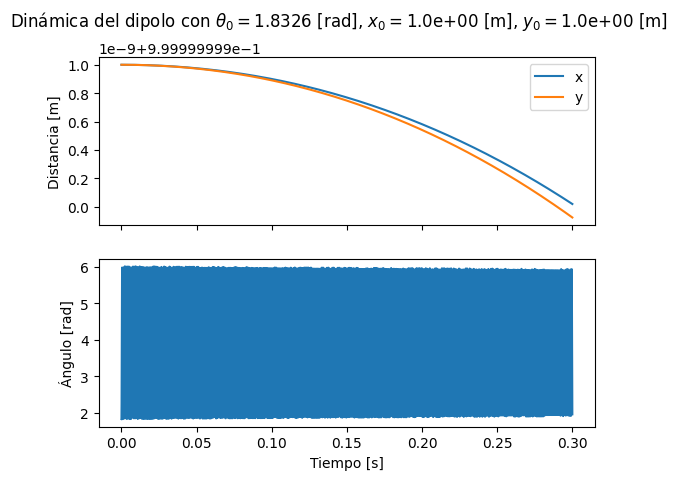

Tiempo de ejecución: 0:06:07.649044 [h:mm:ss.μs]
CPU times: total: 6min 5s
Wall time: 6min 7s


In [42]:
%%time

fields = [
    CargaPuntual2D(q_draw=-1, q=1.6e-7),
    CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-7),
    CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-7),
    CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-7)
]


dipolo = DipoloElectrico2D(7*PI/12,
                           pos_draw=np.array([1, 1, 0]), 
                           t_end=0.3,  
                           fps=30, 
                           fields=fields, 
                           pos=np.array([1, 1, 0]),
                           set_time_interval=False,
                           logging=True,
                           plots=True)

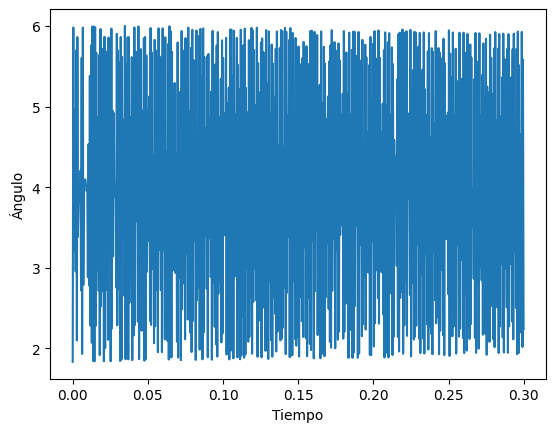

In [50]:
N = 902
new_t = dipolo.solution.t[::int(np.ceil(len(dipolo.solution.t) / N))]
new_y = dipolo.solution.y[6][::int(np.ceil(len(dipolo.solution.y[6]) / N))]

plt.plot(new_t, new_y)
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

In [51]:
len(new_t)  # no da los 902 putos que quería

781

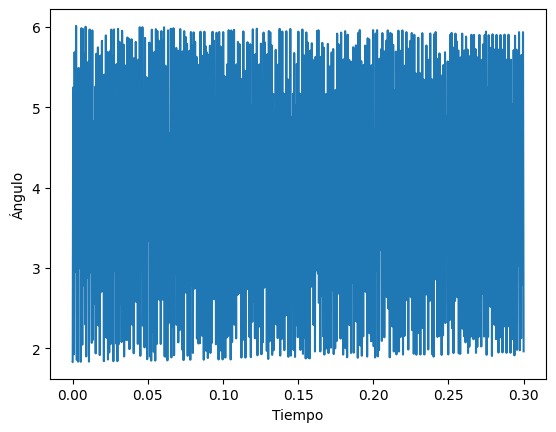

In [52]:
def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

new_t = GetSpacedElements(dipolo.solution.t, N)
new_y = GetSpacedElements(dipolo.solution.y[6], N)

plt.plot(new_t, new_y)
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

In [53]:
len(new_t)  # si da los 902 puntos

902

In [59]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
                CargaPuntual2D(q_draw=-1, q=1.6e-7),
                CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-7),
                CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-7),
                CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-7)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 7*PI/12 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([1, 1, 0]),
                                   pos=np.array([1, 1, 0]),
                                   t_end=0.3,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[140e-9, 420e-9],
                                   set_time_interval=False,
                                   logging=True)
        total_points = int(TOTAL_TIME * self.camera.frame_rate + 2)
        dipolo.save_state()
        dipolo._counter = 0
        #dipolo._new_t = GetSpacedElements(dipolo.solution.t, total_points)
        dipolo._new_angle = GetSpacedElements(dipolo.solution.y[6], total_points)
        dipolo._new_x = GetSpacedElements(dipolo.solution.y[0], total_points)
        dipolo._new_y = GetSpacedElements(dipolo.solution.y[1], total_points)
        dipolo._new_z = GetSpacedElements(dipolo.solution.y[2], total_points)
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            #mob.rotate(mob.solution.y[6][mob._counter])
            mob.rotate(mob._new_angle[mob._counter])
            #mob.move_to([mob.solution.y[0][mob._counter], 
            #             mob.solution.y[1][mob._counter], 
            #             mob.solution.y[2][mob._counter]])
            mob.move_to([mob._new_x[mob._counter], 
                         mob._new_y[mob._counter], 
                         mob._new_z[mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 19:06:59.562574 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [-564.8851158  -560.85701408    0.        ]
tau = 1.5473866218885666e-23
dE_r = [[ 197.81293801  760.26029323    0.        ]
 [ 760.26029323  286.65580423    0.        ]
 [   0.            0.         -484.46874224]]
alpha = 78948297.08608347
a_x = 1.5302723425300137e-07
------------
cantidad puntos = 11.0
[theta, omega] =  [1.832595714594046, 0.0]
Tiempo de ejecución: 0:06:16.200190 [h:mm:ss.μs]


CPU times: total: 7min 13s
Wall time: 7min 16s


Info en video de YouTube:

- **Título**: Ejemplo 5 - dipolo
- **Descripción**:

        Este valor de campo es similar al indicado en el documento del Dr. Yacaman. La oscilación tiene una frecuencia muy alta. El desplazamiento es muy pequeño. En el video se muestran los 0.3 segundos de las gráficas, pero de manera ralentizada, es decir, esos 0.3 segundos se muestran en 10 segundos, para que se pueda apreciar un poco mejor la oscilación, que de igual manera sigue siendo rápida, cabe destacar que en la animación no se aprecia la velocidad real de la oscilación debido a que el video es generado con 30 frames por segundo (fps), lo que hace que aparentemente esté girando más lentamente, pero la gráfica de abajo muestra que en realidad la frecuencia es mucho más alta de lo que se aprecia en la animación.

        E = -5×10^2
        4 cargas puntuales de q = 1.6×10^-7
        ángulo inicial = 7π/12
        posición inicial = (1, 1)
        tiempo de simulación = 0.3 segundos
        (el video muestra el movimiento ralentizado, los cálculos de 0.3 segundos se muestran en 10 segundos)
        
- **Link**: https://youtu.be/HZYzQLc3e4M

### $E\approx -5\times 10^{5}$ generado por 4 cargas puntuales, $\theta_0=7\pi/12$, durante $0.1$ segundos

In [97]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
                CargaPuntual2D(q_draw=-1, q=1.6e-4),
                CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-4),
                CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-4),
                CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-4)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 7*PI/12 # respecto al eje horizontal

        dipolo = DipoloElectrico2D(initial_angle, 
                                   pos_draw=np.array([1, 1, 0]),
                                   pos=np.array([1, 1, 0]),
                                   t_end=0.1,
                                   fps=self.camera.frame_rate,
                                   fields=fields,
                                   longitud_escala=[140e-9, 420e-9],
                                   set_time_interval=False,
                                   logging=True)
        total_points = int(TOTAL_TIME * self.camera.frame_rate + 2)
        dipolo.save_state()
        dipolo._counter = 0
        #dipolo._new_t = GetSpacedElements(dipolo.solution.t, total_points)
        dipolo._new_angle = GetSpacedElements(dipolo.solution.y[6], total_points)
        dipolo._new_x = GetSpacedElements(dipolo.solution.y[0], total_points)
        dipolo._new_y = GetSpacedElements(dipolo.solution.y[1], total_points)
        dipolo._new_z = GetSpacedElements(dipolo.solution.y[2], total_points)
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            #mob.rotate(mob.solution.y[6][mob._counter])
            mob.rotate(mob._new_angle[mob._counter])
            #mob.move_to([mob.solution.y[0][mob._counter], 
            #             mob.solution.y[1][mob._counter], 
            #             mob.solution.y[2][mob._counter]])
            mob.move_to([mob._new_x[mob._counter], 
                         mob._new_y[mob._counter], 
                         mob._new_z[mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-30 00:49:27.699695 [h:mm:ss.μs]

theta = 1.832595714594046
self.pos[0] = 1
l = [-3.62346664e-08  1.35229616e-07  0.00000000e+00]
p = [-5.79754662e-27  2.16367385e-26  0.00000000e+00]
I = 1.9599999987350336e-31
E = [-564885.11579717 -560857.01408207       0.        ]
tau = 1.5473866218885672e-20
dE_r = [[ 197812.9380126   760260.29323263       0.        ]
 [ 760260.29323261  286655.80423188       0.        ]
 [      0.               0.         -484468.74224458]]
alpha = 78948297086.0835
a_x = 0.00015302723425298533
------------
cantidad puntos = 5.0
[theta, omega] =  [1.832595714594046, 0.0]
Tiempo de ejecución: 1:03:56.922791 [h:mm:ss.μs]


CPU times: total: 1h 4min 11s
Wall time: 1h 4min 59s


Info en video de YouTube:

- **Título**: Ejemplo 6 - dipolo
- **Descripción**:

        En este caso el campo es más grande que en el ejemplo anterior, lo que provoca que la oscilación sea aún más frecuente. También se puede notar que el ángulo va disminuyendo con el tiempo, en tan solo 0.1 segundos se nota la disminución. El desplazamiento es muy pequeño. En el video se muestran los 0.1 segundos de las gráficas, pero de manera ralentizada expandidos en 10 segundos.

        E = -5×10^5
        4 cargas puntuales de q = 1.6×10^-4
        ángulo inicial = 7π/12
        posición inicial = (1, 1)
        tiempo de simulación = 0.1 segundos
        (el video muestra el movimiento ralentizado, los cálculos de 0.1 segundos se muestran en 10 segundos)
        
- **Link**: https://youtu.be/jvy_bZ05SRo

### $E\approx 3.2\times 10^{7}$ generado por 1 carga puntual, $\theta_0=13\pi/12$, solo desplazamiento, durante $30$ segundos

In [69]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([-1, 0, 0]), q=2e-2),
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = 13*PI/12 # respecto al eje horizontal

        dipolo = Virus2D(initial_angle, 
                         pos_draw=np.array([1, 1, 0]),
                         pos=np.array([1, 1, 0]),
                         t_end=TOTAL_TIME,
                         fps=self.camera.frame_rate,
                         fields=fields,
                         resolver_angulo=False,
                         longitud_escala=[120e-9, 420e-9],
                         logging=True)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        dipolo.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

Inicio de ejecución: 2023-04-29 21:06:38.930520 [h:mm:ss.μs]

theta = 3.4033920413889427
self.pos[0] = 1
l = [-1.35229616e-07 -3.62346664e-08  0.00000000e+00]
p = [-2.16367385e-26 -5.79754662e-27  0.00000000e+00]
I = 1.9599999987350336e-31
E = [32163601.78835697 16081800.89417849        0.        ]
tau = -1.6148773968157333e-19
dE_r = [[-22514521.25185154 -19298161.07301506         0.        ]
 [-19298161.07301422   6432720.35766977         0.        ]
 [        0.                 0.          16081800.89417848]]
alpha = -823917039723.4493
a_x = 0.005990227972602526
------------
cantidad puntos = 902
[theta, omega] =  [3.4033920413889427, 0.0]
Tiempo de ejecución: 0:00:01.591745 [h:mm:ss.μs]


CPU times: total: 15min 33s
Wall time: 6min 47s


Info en video de YouTube:

- **Título**: Ejemplo 7 - dipolo
- **Descripción**:

        Aquí el campo es grande, por lo tanto, la oscilación (cambio del ángulo) no es calculada, ya que el método numérico no puede, de ahí que en la gráfica se vea el ángulo sin cambio, no es que no oscile, sino que simplemente no se calculó. Aquí el desplazamiento ya es notorio, se mueve en ambas direcciones por más o menos metro y medio. A diferencia del ejemplo 2, dado el ángulo inicial si hay oscilación, pero no es calculada y el desplazamiento es diferente en ambos ejes, como se aprecia en la gráfica.

        E = 3.2×10^7
        1 carga puntual de q = 2×10^-2
        ángulo inicial = 13π/12
        posición inicial = (1, 1)
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/3wQkSDmOke8

### Varios dipolos, $E\approx 1.6\times 10^{-3}$ generado por un par de placas paralelas, diferentes ángulos de inicio (no hay desplazamiento), durante $30$ segundos

In [77]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            Placas2D(E=1.6e-3)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = DipoloElectrico2D(PI/4, 
                                    pos_draw=np.array([-3, 0, 0]),
                                    pos=np.array([-3, 0, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = DipoloElectrico2D(PI/8, 
                                    pos_draw=np.array([1, 2, 0]),
                                    pos=np.array([1, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = DipoloElectrico2D(3*PI/4, 
                                    pos_draw=np.array([-1, -1, 0]),
                                    pos=np.array([-1, -1, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = DipoloElectrico2D(-11*PI/12, 
                                    pos_draw=np.array([3.5, -2, 0]),
                                    pos=np.array([3.5, -2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = DipoloElectrico2D(2*PI/5, 
                                    pos_draw=np.array([4, 3, 0]),
                                    pos=np.array([4, 3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = DipoloElectrico2D(-3*PI/5, 
                                    pos_draw=np.array([-5, 2, 0]),
                                    pos=np.array([-5, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = DipoloElectrico2D(-13*PI/14, 
                                    pos_draw=np.array([-4.5, -3.3, 0]),
                                    pos=np.array([-4.5, -3.3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 3min 48s
Wall time: 3min 50s


Info en video de YouTube:

- **Título**: Ejemplo 8 - dipolos
- **Descripción**:

        Aquí el campo es pequeño para que se note la rotación, el desplazamiento es tan pequeño que no se aprecia en la animación.

        E = 1.6×10^-3
        entre un par de placas paralelas
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/V_TaJ5MHHiY

In [86]:
TOTAL_TIME = 30


class Example(Scene):

    def construct(self):
        
        fields = [
            Placas2D(E=1.6e-3)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = Virus2D(PI/5, 
                          pos_draw=np.array([0, 0, 0]),
                          pos=np.array([0, 0, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = Virus2D(PI/7, 
                          pos_draw=np.array([2.2, 2.2, 0]),
                          pos=np.array([2.2, 2.2, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = Virus2D(5*PI/4, 
                          pos_draw=np.array([-2, -1.5, 0]),
                          pos=np.array([-2, -1.5, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = Virus2D(11*PI/12, 
                          pos_draw=np.array([5.5, -2.6, 0]),
                          pos=np.array([5.5, -2.6, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = Virus2D(-2*PI/5, 
                          pos_draw=np.array([5, 3.3, 0]),
                          pos=np.array([5, 3.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = Virus2D(4*PI/5, 
                          pos_draw=np.array([-4.5, 3.5, 0]),
                          pos=np.array([-4.5, 3.5, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = Virus2D(13*PI/14, 
                          pos_draw=np.array([-4.5, -2.3, 0]),
                          pos=np.array([-4.5, -2.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 1h 11min 23s
Wall time: 32min 11s


Info en video de YouTube:

- **Título**: Ejemplo 8 - viruses
- **Descripción**:

        Aquí el campo es pequeño para que se note la rotación, el desplazamiento es tan pequeño que no se aprecia en la animación.

        E = 1.6×10^-3
        entre un par de placas paralelas
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 30 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/HWn7V46Tte0

### Varios dipolos, $E\approx 6.5\times 10^{-2}$ generado por 4 cargas puntuales, diferentes ángulos de inicio (desplazamiento pequeño), durante $10$ segundos

In [90]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1, q=1.6e-11),
            CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-11),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-11),
            CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-11)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = DipoloElectrico2D(PI/4, 
                                    pos_draw=np.array([-3, 0, 0]),
                                    pos=np.array([-3, 0, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = DipoloElectrico2D(PI/8, 
                                    pos_draw=np.array([1, 2, 0]),
                                    pos=np.array([1, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = DipoloElectrico2D(3*PI/4, 
                                    pos_draw=np.array([-1, -1, 0]),
                                    pos=np.array([-1, -1, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = DipoloElectrico2D(-11*PI/12, 
                                    pos_draw=np.array([3.5, -2, 0]),
                                    pos=np.array([3.5, -2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = DipoloElectrico2D(2*PI/5, 
                                    pos_draw=np.array([4, 3, 0]),
                                    pos=np.array([4, 3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = DipoloElectrico2D(-3*PI/5, 
                                    pos_draw=np.array([-5, 2, 0]),
                                    pos=np.array([-5, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = DipoloElectrico2D(-13*PI/14, 
                                    pos_draw=np.array([-4.5, -3.3, 0]),
                                    pos=np.array([-4.5, -3.3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_desplazamiento=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 1min 25s
Wall time: 1min 26s


Info en video de YouTube:

- **Título**: Ejemplo 9 - dipolos
- **Descripción**:

        En este caso el campo es pequeño, por lo que, se notan las oscilaciones, pero no el desplazamiento.
        
        E = 6.5×10^−2
        4 cargas puntual de q = 1.6×10^-11
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/ZHJC3U4j5bM

In [91]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1, q=1.6e-11),
            CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-11),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-11),
            CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-11)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = Virus2D(PI/5, 
                          pos_draw=np.array([4, 0, 0]),
                          pos=np.array([4, 0, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = Virus2D(PI/7, 
                          pos_draw=np.array([2.2, 2.2, 0]),
                          pos=np.array([2.2, 2.2, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = Virus2D(5*PI/4, 
                          pos_draw=np.array([-2, -1.5, 0]),
                          pos=np.array([-2, -1.5, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = Virus2D(11*PI/12, 
                          pos_draw=np.array([5.5, -2.6, 0]),
                          pos=np.array([5.5, -2.6, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = Virus2D(-2*PI/5, 
                          pos_draw=np.array([5, 3.3, 0]),
                          pos=np.array([5, 3.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = Virus2D(4*PI/5, 
                          pos_draw=np.array([-4.5, 3.5, 0]),
                          pos=np.array([-4.5, 3.5, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = Virus2D(13*PI/14, 
                          pos_draw=np.array([-4.5, -2.3, 0]),
                          pos=np.array([-4.5, -2.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_desplazamiento=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 23min 51s
Wall time: 11min 7s


Info en video de YouTube:

- **Título**: Ejemplo 9 - viruses
- **Descripción**:

        En este caso el campo es pequeño, por lo que, se notan las oscilaciones, pero no el desplazamiento.
        
        E = 6.5×10^−2
        4 cargas puntual de q = 1.6×10^-11
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/bjEF3McaTV0

### Varios dipolos, $E\approx 6.5\times 10^{8}$ generado por 4 cargas puntuales, diferentes ángulos de inicio (sin cálculo de ángulo), durante $10$ segundos

In [92]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1, q=1.6e-1),
            CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-1),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-1),
            CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-1)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = DipoloElectrico2D(PI/4, 
                                    pos_draw=np.array([-3, 0, 0]),
                                    pos=np.array([-3, 0, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = DipoloElectrico2D(PI/8, 
                                    pos_draw=np.array([1, 2, 0]),
                                    pos=np.array([1, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = DipoloElectrico2D(3*PI/4, 
                                    pos_draw=np.array([-1, -1, 0]),
                                    pos=np.array([-1, -1, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = DipoloElectrico2D(-11*PI/12, 
                                    pos_draw=np.array([3.5, -2, 0]),
                                    pos=np.array([3.5, -2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = DipoloElectrico2D(2*PI/5, 
                                    pos_draw=np.array([4, 3, 0]),
                                    pos=np.array([4, 3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = DipoloElectrico2D(-3*PI/5, 
                                    pos_draw=np.array([-5, 2, 0]),
                                    pos=np.array([-5, 2, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = DipoloElectrico2D(-13*PI/14, 
                                    pos_draw=np.array([-4.5, -3.3, 0]),
                                    pos=np.array([-4.5, -3.3, 0]),
                                    t_end=TOTAL_TIME,
                                    fps=self.camera.frame_rate,
                                    fields=fields,
                                    resolver_angulo=False,
                                    longitud_escala=[140e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 1min 20s
Wall time: 1min 21s


Info en video de YouTube:

- **Título**: Ejemplo 10 - dipolos
- **Descripción**:

        Aquí el campo es grande, por lo que, se nota el desplazamiento y no se calcula la oscilación.
        
        E = 6.5×10^8
        4 cargas puntual de q = 1.6×10^-1
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/lVxUnp5VR80

In [96]:
TOTAL_TIME = 10


class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1, q=1.6e-1),
            CargaPuntual2D(pos=np.array([5, 2, 0]), q=1.6e-1),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1, q=1.6e-1),
            CargaPuntual2D(pos=np.array([-4, 1, 0]), q=1.6e-1)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        

        dipolo1 = Virus2D(PI/5, 
                          pos_draw=np.array([4, 0, 0]),
                          pos=np.array([4, 0, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo1.save_state()
        dipolo1._counter = 0
        
        dipolo2 = Virus2D(PI/7, 
                          pos_draw=np.array([2.2, 2.2, 0]),
                          pos=np.array([2.2, 2.2, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo2.save_state()
        dipolo2._counter = 0
        
        dipolo3 = Virus2D(5*PI/4, 
                          pos_draw=np.array([-1, -2, 0]),
                          pos=np.array([-1, -2, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo3.save_state()
        dipolo3._counter = 0
        
        dipolo4 = Virus2D(11*PI/12, 
                          pos_draw=np.array([5.5, -2.6, 0]),
                          pos=np.array([5.5, -2.6, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo4.save_state()
        dipolo4._counter = 0
        
        dipolo5 = Virus2D(-2*PI/5, 
                          pos_draw=np.array([5, 3.3, 0]),
                          pos=np.array([5, 3.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo5.save_state()
        dipolo5._counter = 0
        
        dipolo6 = Virus2D(4*PI/5, 
                          pos_draw=np.array([-5.5, 3.5, 0]),
                          pos=np.array([-5.5, 3.5, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo6.save_state()
        dipolo6._counter = 0
        
        dipolo7 = Virus2D(13*PI/14, 
                          pos_draw=np.array([-4.5, -2.3, 0]),
                          pos=np.array([-4.5, -2.3, 0]),
                          t_end=TOTAL_TIME,
                          fps=self.camera.frame_rate,
                          fields=fields,
                          resolver_angulo=False,
                          longitud_escala=[120e-9, 420e-9])
        dipolo7.save_state()
        dipolo7._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[6][mob._counter])
            mob.move_to([mob.solution.y[0][mob._counter], 
                         mob.solution.y[1][mob._counter], 
                         mob.solution.y[2][mob._counter]])
            mob._counter += 1
            
        dipolo1.add_updater(dipolo_dinamica)
        self.add(dipolo1)
        dipolo1.set_z_index(11)
        
        dipolo2.add_updater(dipolo_dinamica)
        self.add(dipolo2)
        dipolo2.set_z_index(11)
        
        dipolo3.add_updater(dipolo_dinamica)
        self.add(dipolo3)
        dipolo3.set_z_index(11)
        
        dipolo4.add_updater(dipolo_dinamica)
        self.add(dipolo4)
        dipolo4.set_z_index(11)
        
        dipolo5.add_updater(dipolo_dinamica)
        self.add(dipolo5)
        dipolo5.set_z_index(11)
        
        dipolo6.add_updater(dipolo_dinamica)
        self.add(dipolo6)
        dipolo6.set_z_index(11)
        
        dipolo7.add_updater(dipolo_dinamica)
        self.add(dipolo7)
        dipolo7.set_z_index(11)
        
        
        self.wait(TOTAL_TIME)
        

%time %manim $_RV

CPU times: total: 23min 29s
Wall time: 10min 55s


Info en video de YouTube:

- **Título**: Ejemplo 10 - viruses
- **Descripción**:

        Aquí el campo es grande, por lo que, se nota el desplazamiento y no se calcula la oscilación.
        
        E = 6.5×10^8
        4 cargas puntual de q = 1.6×10^-1
        varios ángulos iniciales
        varias posiciones iniciales
        tiempo de simulación = 10 segundos
        (el video muestra el movimiento en tiempo real)
        
- **Link**: https://youtu.be/Vhx-LJVa0_o